In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import fashion_mnist

In [3]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
#scaleing - Normalize this data
x_train=x_train/255
x_test=x_test/255

In [7]:
from keras import Sequential,Model
from keras.layers import Dense,Flatten,Reshape

In [8]:
#create a Model - 2D data
class AutoEncoder(Model):
  def __init__(self):
    super().__init__(name="autoencoder")
    self.encoder=Sequential([
        Flatten(), #(28*28=784-This data converted 784)
        Dense(64,activation="relu") #(784 compressed to 64)
    ])
    self.decoder=Sequential([
        Dense(784,activation="relu"), #(64 compressed to 784)
        Reshape((28,28))
    ])

  def call(self,x):
    encode=self.encoder(x)
    decode=self.decoder(encode)
    return decode

In [9]:
#create a Model - 3D data
# from keras.layers import Conv2D,Conv2DTranspose,Input

# class AutoEncoder(Model):
#   def __init__(self):
#     super().__init__(name="autoencoder")
#     self.encoder=Sequential([
#         Input((64,64,3)),
#         Conv2D(16,(3,3),padding="SAME",strides=2),
#         Conv2D(32,(3,3),padding="SAME",strides=2)
#     ])
#     self.decoder=Sequential([
#         Conv2DTranspose(32,3,padding="SAME",strides=2),
#         Conv2DTranspose(16,3,padding="SAME",strides=2),
#         Conv2D(1,3,padding="SAME",strides=2)
#     ])

#   def call(self,x):
#     encode=self.encoder(x)
#     decode=self.decoder(encode)
#     return decode

In [10]:
model=AutoEncoder()

In [11]:
model.compile(optimizer="adam",loss="mse")

In [12]:
model.fit(x_train,x_train,validation_data=(x_test,x_test),epochs=100)

Epoch 1/100
1875/1875 [==============================] - 9s 3ms/step - loss: 0.0277 - val_loss: 0.0214
Epoch 2/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0199 - val_loss: 0.0191
Epoch 3/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0188 - val_loss: 0.0187
Epoch 4/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0185 - val_loss: 0.0185
Epoch 5/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0183 - val_loss: 0.0180
Epoch 6/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0178 - val_loss: 0.0181
Epoch 7/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0178 - val_loss: 0.0180
Epoch 8/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0177 - val_loss: 0.0178
Epoch 9/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0177 - val_loss: 0.0177
Epoch 10/100
1875/1875 [==============================] - 6s 3ms/step - l

In [13]:
#predict the model
encoded_images=model.encoder(x_test).numpy()
decoded_images=model.decoder(encoded_images).numpy()

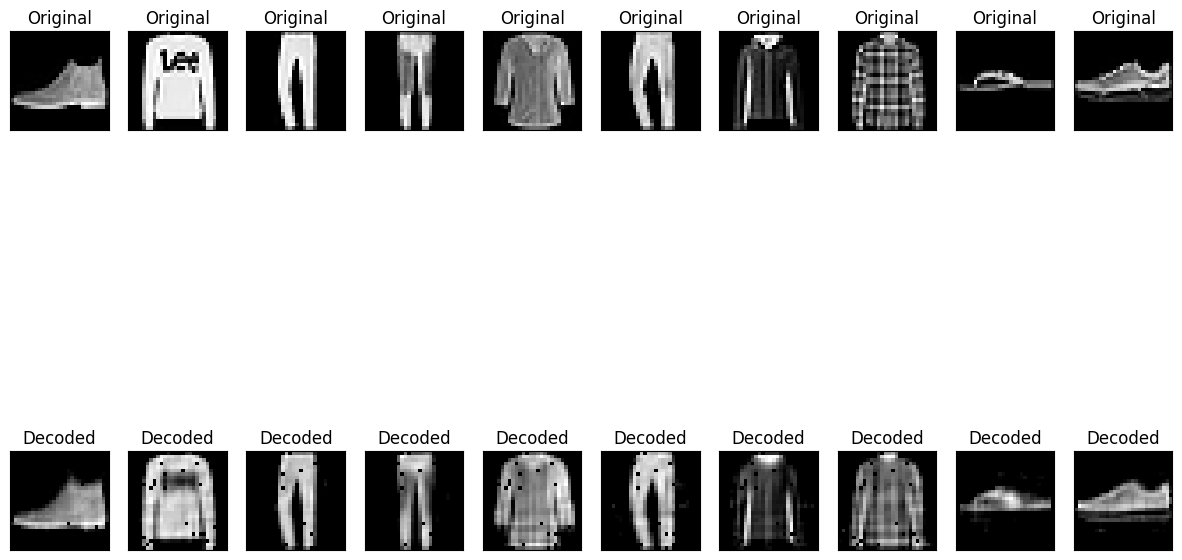

In [14]:
#Visuvalize the data
n=10
plt.figure(figsize=(15,10))

for i in range(10):
  ax=plt.subplot(2,n,i+1)
  plt.imshow(x_test[i])
  plt.title("Original")
  plt.gray()
  plt.xticks([])
  plt.yticks([])

  ax=plt.subplot(2,n,i+11)
  plt.imshow(decoded_images[i])
  plt.title("Decoded")
  plt.gray()
  plt.xticks([])
  plt.yticks([])

In [15]:
#we will add noise in this data
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [16]:
#scaleing - Normalize this data
x_train=x_train/255
x_test=x_test/255

In [17]:
import tensorflow as tf
x_train_noisy=x_train+0.2*tf.random.normal(shape=x_train.shape)
x_test_noisy=x_test+0.2*tf.random.normal(shape=x_test.shape)

In [18]:
#In ths noise we have range 0 to 1 so we will do clip this data
x_train_noisy=tf.clip_by_value(x_train_noisy,clip_value_min=0.,clip_value_max=1.)
x_test_noisy=tf.clip_by_value(x_test_noisy,clip_value_min=0.,clip_value_max=1.)

In [19]:
denoise = AutoEncoder()

In [20]:
denoise.compile(optimizer="adam",loss="mse")

In [21]:
denoise.fit(x_train_noisy,x_train,validation_data=(x_test_noisy,x_test),epochs=100)

Epoch 1/100
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0284 - val_loss: 0.0207
Epoch 2/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0200 - val_loss: 0.0195
Epoch 3/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0193 - val_loss: 0.0191
Epoch 4/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0190 - val_loss: 0.0192
Epoch 5/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0190 - val_loss: 0.0189
Epoch 6/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0189 - val_loss: 0.0190
Epoch 7/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0189 - val_loss: 0.0189
Epoch 8/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0189 - val_loss: 0.0190
Epoch 9/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0188 - val_loss: 0.0189
Epoch 10/100
1875/1875 [==============================] - 6s 3ms/step - l

In [22]:
#predict the model
encoded_images=model.encoder(x_test_noisy).numpy()
decoded_images=model.decoder(encoded_images).numpy()

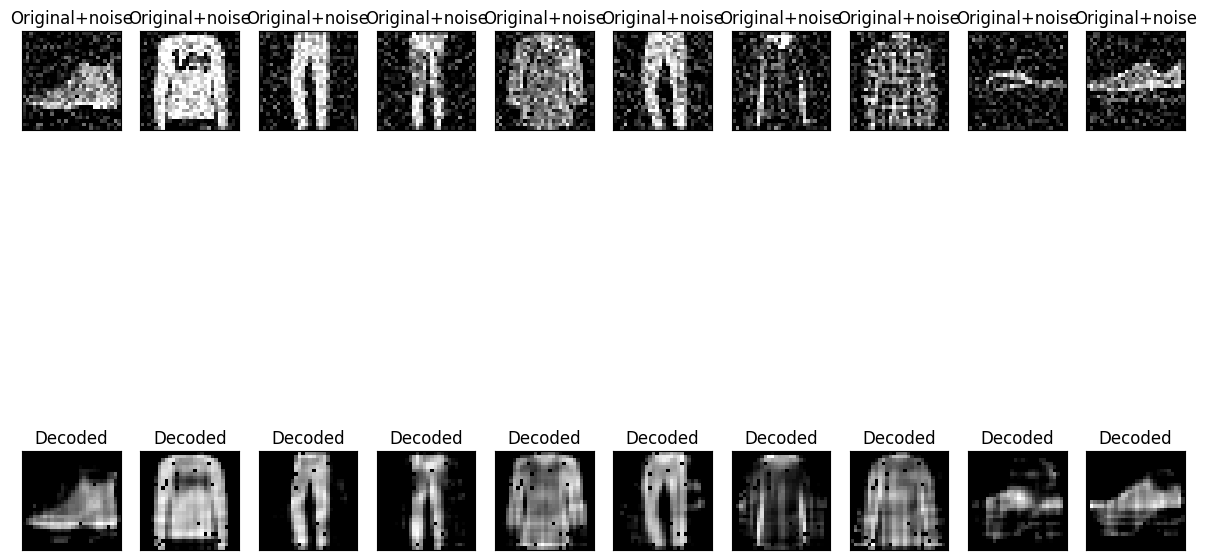

In [23]:
#Visuvalize the data
n=10
plt.figure(figsize=(15,10))

for i in range(10):
  ax=plt.subplot(2,n,i+1)
  plt.imshow(x_test_noisy[i])
  plt.title("Original+noise")
  plt.gray()
  plt.xticks([])
  plt.yticks([])

  ax=plt.subplot(2,n,i+11)
  plt.imshow(decoded_images[i])
  plt.title("Decoded")
  plt.gray()
  plt.xticks([])
  plt.yticks([])